In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('final_players.csv')
player_2023=pd.read_csv('Full_Players_2023.csv')
player_2022=pd.read_csv('Full_Players_2022.csv')
player_2021=pd.read_csv('Full_Players_2021.csv')
newbie=pd.read_csv('newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player   Nation Pos                Squad  \
0              0        Luis Muriel   co COL  FW             Atalanta   
1              1       Paulo Dybala   ar ARG  FW        Juventus+Roma   
2              2        Jonny Evans  nir NIR  DF       Leicester City   
3              3          Mário Rui   pt POR  DF               Napoli   
4              4        Raúl Albiol   es ESP  DF           Villarreal   
...          ...                ...      ...  ..                  ...   
1507        2504   Souleymane Touré   fr FRA  DF    Marseille+Auxerre   
1508        2506        Jere Uronen   fi FIN  DF     Brest+Schalke 04   
1509        2507         Yan Valery   tn TUN  DF   Southampton+Angers   
1510        2513            Vitinha   pt POR  MF  Marseille+Paris S-G   
1511        2518  Alessandro Zanoli   it ITA  DF     Sampdoria+Napoli   

                               Comp   Age    Born    MP  Starts     Min   90s  \
0                        it Serie A  32.0  1991.0  92.0    43.0  4048.0  45.0   
1                        it Serie A  29.0  1993.0  74.0    61.0  4932.0  54.8   
2                eng Premier League  35.0  1988.0  59.0    56.0  4872.0  54.2   
3                        it Serie A  32.0  1991.0  83.0    72.0  6410.0  71.1   
4                        es La Liga  37.0  1985.0  88.0    87.0  7699.0  85.5   
...                             ...   ...     ...   ...     ...     ...   ...   
1507                     fr Ligue 1  19.0  2003.0  24.0    18.0  1656.0  18.4   
1508       fr Ligue 1+de Bundesliga  28.0  1994.0  17.0    12.0   976.0  10.8   
1509  eng Premier League+fr Ligue 1  23.0  1999.0  31.0    31.0  2542.0  28.2   
1510                     fr Ligue 1  22.0  2000.0  50.0    34.0  2910.0  32.4   
1511                     it Serie A  21.0  2000.0  23.0    16.0  1552.0  17.2   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.76       1.16        0.65          1.05      0.57   
1            0.48       0.73        0.36          0.62      0.39   
2            0.05       0.11        0.05          0.11      0.04   
3            0.00       0.18        0.00          0.18      0.04   
4            0.00       0.00        0.00          0.00      0.02   
...           ...        ...         ...           ...       ...   
1507         0.05       0.05        0.05          0.05      0.08   
1508         0.00       0.09        0.00          0.09      0.01   
1509         0.00       0.00        0.00          0.00      0.03   
1510         0.12       0.22        0.12          0.22      0.22   
1511         0.12       0.29        0.12          0.29      0.16   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.88        0.46            0.78               264.0   
1             0.65        0.29            0.55               190.0   
2             0.07        0.04            0.07                12.0   
3             0.18        0.04            0.18                60.0   
4             0.03        0.02            0.03                17.0   
...            ...         ...             ...                 ...   
1507          0.02        0.08            0.02                19.0   
1508          0.13        0.01            0.13                12.0   
1509          0.07        0.03            0.07                69.0   
1510          0.88        0.22            0.88                64.0   
1511          0.15        0.16            0.15                45.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0             149.0            56.0             112.0               42.0   
1             101.0            53.0              79.0               42.0   
2              10.0            83.0               2.0               17.0   
3              35.0            58.0              22.0               37.0   
4              11.0            65.0               6.0               35.0   
...             ...             ...       

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the Forwards (FW) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'] == 'FW']
newbie=newbie[newbie['Pos']=='FW']
player_2021=player_2021[player_2021['Pos']=='FW']
player_2022=player_2022[player_2022['Pos']=='FW']
player_2023=player_2023[player_2023['Pos']=='FW']
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)

In [5]:
# Step 1: Extract names from 'newbie' DataFrame
newbie_players_list = newbie['Player'].tolist()

# Step 2: Filter 'forward_players' based on the names from 'newbie'
filtered_forward_players = forward_players[forward_players['Player'].isin(newbie_players_list)]

# Optional: Reset the index of the filtered DataFrame
filtered_forward_players = filtered_forward_players.reset_index(drop=True)


In [6]:
final_player.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts',
       ...
       'Penalty_Kicks_Conceded_per_90', 'Ball_Recoveries_per_90',
       'Aerials_Won_per_90', 'Aerials_Lost_per_90', 'Seasons at top 5',
       'Seasons in PL', 'Seasons in Liga', 'Seasons in Serie A',
       'Seasons in Ligue 1', 'Seasons in Bundesliga'],
      dtype='object', length=124)

In [7]:
Kane_2023=player_2023[player_2023['Player']=='Harry Kane']
Kane_2023

Unnamed: 0.1  Unnamed: 0      Player   Nation Pos      Squad  \
139          1126        1350  Harry Kane  eng ENG  FW  Tottenham   

                   Comp  Age  Born  MP  Starts   Min   90s  Goals_per90  \
139  eng Premier League   29  1993  38      38  3405  37.8         0.79   

     G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
139       0.87        0.66          0.74      0.57          0.75        0.44   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
139            0.63               108.0           40.0            37.0   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
139              53.0               49.1           35.13   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
139                    0.74                     2.8                   17.09   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
139                   15.85                    4.42   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
139                      34.97                       2.86   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
139                  1.06                      1.4           22.06   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
139                 120.26                                48.73   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
139                        1.59                1.32   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
139                         0.56                1.96                 1.53   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
139                   27.28                                5.11   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
139                        3.46                     0.48   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
139                   2.35                   0.05                  0.34   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
139              0.32                     0.32                   0.08   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
139                   0.26                    0.0                  0.05   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
139              0.08                     0.08                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
139             642.0             921.0               69.7         12295.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
139          4345.0             286.0             368.0               77.7   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
139              236.0              302.0                78.1   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
139            103.0            164.0              62.8            0.08   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
139        0.19       0.11         -0.11               1.51   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
139               2.65                        1.24   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
139                         0.16                       4.76   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
139                    24.37                    22.57   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
139                     1.59                     0.37                  0.53   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
139             0.48            0.98                    0.66   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
139                  0.0                     0.0          

In [8]:
Kane_2021=player_2021[player_2021['Player']=='Harry Kane']
Kane_2021

Unnamed: 0.1  Unnamed: 0      Player   Nation Pos      Squad  \
154          1099      1278.0  Harry Kane  eng ENG  FW  Tottenham   

                   Comp   Age    Born    MP  Starts     Min   90s  \
154  eng Premier League  27.0  1993.0  35.0    35.0  3082.0  34.2   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
154         0.67       1.08        0.55          0.96      0.59          0.79   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
154        0.49             0.7               100.0           52.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
154            52.0              48.0               48.0           40.73   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
154                    1.49                    3.74                   20.03   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
154                    17.4                    4.65   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
154                      40.61                       2.92   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
154                  1.52                      1.4           23.65   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
154                 135.91                                66.37   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
154                        2.19                1.46   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
154                         0.88                1.84                 1.58   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
154                   31.35                                5.41   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
154                        3.71                     0.76   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
154                   2.19                   0.09                  0.56   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
154              0.44                     0.38                   0.06   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
154                   0.44                   0.03                  0.18   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
154              0.03                     0.09                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
154             652.0             965.0               67.6         10806.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
154          3448.0             312.0             423.0               73.8   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
154              196.0              273.0                71.8   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
154             86.0            140.0              61.4            0.41   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
154        0.21       0.11           0.2               1.43   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
154               2.92                        1.11   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
154                         0.15                       3.86   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
154                    28.22                    27.08   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
154                     0.94                     0.35                  0.18   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
154             0.64            1.11                    0.35   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
154                  0.0                    

In [9]:
Kane_2022=player_2022[player_2022['Player']=='Harry Kane']
Kane_2022

Unnamed: 0.1  Unnamed: 0      Player   Nation Pos      Squad  \
168          1125      1337.0  Harry Kane  eng ENG  FW  Tottenham   

                   Comp   Age    Born    MP  Starts     Min   90s  \
168  eng Premier League  28.0  1993.0  37.0    36.0  3232.0  35.9   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
168         0.47       0.72        0.36          0.61      0.52          0.77   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
168        0.43            0.68               100.0           54.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
168            54.0              46.0               46.0           38.64   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
168                    1.42                    3.82                    17.6   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
168                    17.8                    4.74   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
168                      38.52                       2.79   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
168                   1.5                     1.28           24.82   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
168                 140.97                                 61.5   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
168                        2.42                1.59   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
168                         0.86                 2.7                  1.7   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
168                    30.5                                5.91   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
168                        3.56                     0.58   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
168                   2.62                   0.06                  0.28   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
168              0.45                     0.17                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
168                   0.47                    0.0                  0.03   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
168              0.08                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
168             637.0             945.0               67.4         11124.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
168          3759.0             305.0             397.0               76.8   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
168              197.0              283.0                69.6   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
168             91.0            140.0              65.0            0.25   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
168        0.25       0.15          -0.0               1.36   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
168               2.48                        1.17   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
168                         0.17                       3.98   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
168                    26.32                    24.71   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
168                     1.31                     0.28                  0.61   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
168             0.36            1.17                     0.5   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
168                  0.0                    

In [10]:
Kane=forward_players[forward_players['Player']=='Harry Kane']
Kane

Unnamed: 0      Player   Nation Pos      Squad                Comp   Age  \
58         397  Harry Kane  eng ENG  FW  Tottenham  eng Premier League  30.0   

      Born     MP  Starts     Min    90s  Goals_per90  G+A_per90  G-PK_per90  \
58  1993.0  110.0   109.0  9719.0  107.9         0.65       0.89        0.53   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
58          0.77      0.56          0.77        0.45            0.67   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
58               308.0          146.0            47.0             147.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
58               48.0           38.07                     1.2   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
58                    3.44                   18.19                   16.99   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
58                     4.6                      37.94   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
58                       2.86                  1.35                     1.36   

    Carries_per_90  Total_Distance_per_90  \
58           23.48                 132.11   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
58                                58.57                        2.06   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
58                1.45                         0.76                2.17   

    Dispossessed_per_90  Passes_Received_per_90  \
58                  1.6                   29.64   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
58                                5.47                        3.57   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
58                      0.6                   2.39                   0.07   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
58                  0.39               0.4                     0.29   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
58                   2.39                   0.39                   0.01   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
58                  0.08              0.06                     0.06   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
58                    0.0            1931.0            2831.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
58               68.0         34225.0         11552.0             903.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
58            1188.0               76.0              629.0              858.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
58                73.0            280.0            444.0              63.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
58            0.24        0.22       0.12          0.02               1.43   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
58               2.68                        1.18   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
58                         0.16                       4.22   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
58                    26.24                    24.71                     1.29   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
58                     0.33                  0.45             0.49   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
58            1.08                    0.51                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
58                     0.0                      0.0                      0.0   

    Passes

In [11]:
forward_players.iloc[10]

Unnamed: 0                                           50
Player                                 Lautaro Martínez
Nation                                           ar ARG
Pos                                                  FW
Squad                                             Inter
Comp                                         it Serie A
Age                                                25.0
Born                                             1997.0
MP                                                111.0
Starts                                             85.0
Min                                              7419.0
90s                                                82.5
Goals_per90                                        0.72
G+A_per90                                           0.9
G-PK_per90                                         0.64
G+A-PK_per90                                       0.83
xG_per90                                           0.66
xG+xAG_per90                                    

In [12]:
for column in forward_players.columns:
    print(column)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Take_Ons_Attempted
Take_Ons_Succ
Take_Ons_Succ%
Tackled_Take_Ons
Tackled_Take_Ons%
Touches_per_90
Touches_Def_Pen_per_90
Touches_Def_3rd_per_90
Touches_Mid_3rd_per_90
Touches_Att_3rd_per_90
Touches_Att_Pen_per_90
Tocuhes_Live_Balls_per_90
Take_Ons_Attempted_per_90
Take_Ons_Succ_per_90
Tackled_Take_Ons_per_90
Carries_per_90
Total_Distance_per_90
Progressive_Distance_Carried_per_90
Progressive_Carries_per_90
1/3_Carries_per_90
Carries_Penalty_Area_per_90
Miscontrols_per_90
Dispossessed_per_90
Passes_Received_per_90
Progressive_Passes_Received_per_90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per_90
Pass_Dead_Shot_per_90
Take_Ons_Shot_per_90
Shot-Shot_per_90
Fouls_drawn_Shot_per_90
Defensive_Shot_per_90
Pass_Live_Goal_per_90
Pass_Dead_Goal_per_90
Take_Ons_Goal_per_90
Shot_Goal_per_90
Fouls_Drawn_Goal_per_90


In [13]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
kane_percentile_ranks = round(players_percentile_ranks.iloc[[58]],0)

# Print the percentile ranks for Harry Kane
print(kane_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
58         92.0       94.0        91.0          94.0      87.0          91.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
58        83.0            90.0                95.0           94.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
58            55.0              96.0               49.0            64.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
58                    79.0                    69.0                    81.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
58                    50.0                    45.0                       64.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
58                       68.0                  69.0                     71.0   

    Carries_per_90  Total_Distance_per_90  \
58            67.0     

In [14]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_percentile_ranks = round(players_percentile_ranks.iloc[[10]],0)

# Print the percentile ranks for Harry Kane
print(kane_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
10        95.0          95.0        94.0            94.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
10                        57.0                     67.0            67.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
10        73.0       49.0               75.0                        59.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
10            87.0                      87.0           84.0      92.0  


In [15]:
kane_percentile_ranks_list = kane_percentile_ranks.values.flatten().tolist()

kane_percentile_ranks_list

[95.0,
 95.0,
 94.0,
 94.0,
 57.0,
 67.0,
 67.0,
 73.0,
 49.0,
 75.0,
 59.0,
 87.0,
 87.0,
 84.0,
 92.0]

In [16]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[139]],0)

# Print the percentile ranks for Harry Kane
print(kane_2023_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
139        94.0          89.0        83.0            86.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
139                        74.0                     77.0            53.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
139        83.0       68.0               81.0                        85.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
139            88.0                      83.0           61.0     100.0  


In [17]:
kane_2023_percentile_ranks_list = kane_2023_percentile_ranks.values.flatten().tolist()

kane_2023_percentile_ranks_list

[94.0,
 89.0,
 83.0,
 86.0,
 74.0,
 77.0,
 53.0,
 83.0,
 68.0,
 81.0,
 85.0,
 88.0,
 83.0,
 61.0,
 100.0]

In [18]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[139]],0)

# Print the percentile ranks for Harry Kane
print(kane_2022_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
139        73.0          66.0        49.0            57.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
139                        27.0                     51.0            54.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
139        74.0       63.0               45.0                        38.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
139            83.0                      69.0           55.0      91.0  


In [19]:
kane_2022_percentile_ranks_list = kane_2022_percentile_ranks.values.flatten().tolist()

kane_2022_percentile_ranks_list

[73.0,
 66.0,
 49.0,
 57.0,
 27.0,
 51.0,
 54.0,
 74.0,
 63.0,
 45.0,
 38.0,
 83.0,
 69.0,
 55.0,
 91.0]

In [20]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[154]],0)

# Print the percentile ranks for Harry Kane
print(kane_2021_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
154        90.0          98.0        87.0            92.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
154                        86.0                     95.0            98.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
154        87.0       74.0               82.0                        87.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
154            63.0                      70.0           55.0      88.0  


In [21]:
kane_2021_percentile_ranks_list = kane_2021_percentile_ranks.values.flatten().tolist()

kane_2021_percentile_ranks_list

[90.0,
 98.0,
 87.0,
 92.0,
 86.0,
 95.0,
 98.0,
 87.0,
 74.0,
 82.0,
 87.0,
 63.0,
 70.0,
 55.0,
 88.0]

In [22]:
image_path = "Harry.jpg"
fdj_cropped = Image.open(image_path)


In [23]:
split_params = [param.replace('_', '\n') for param in params]


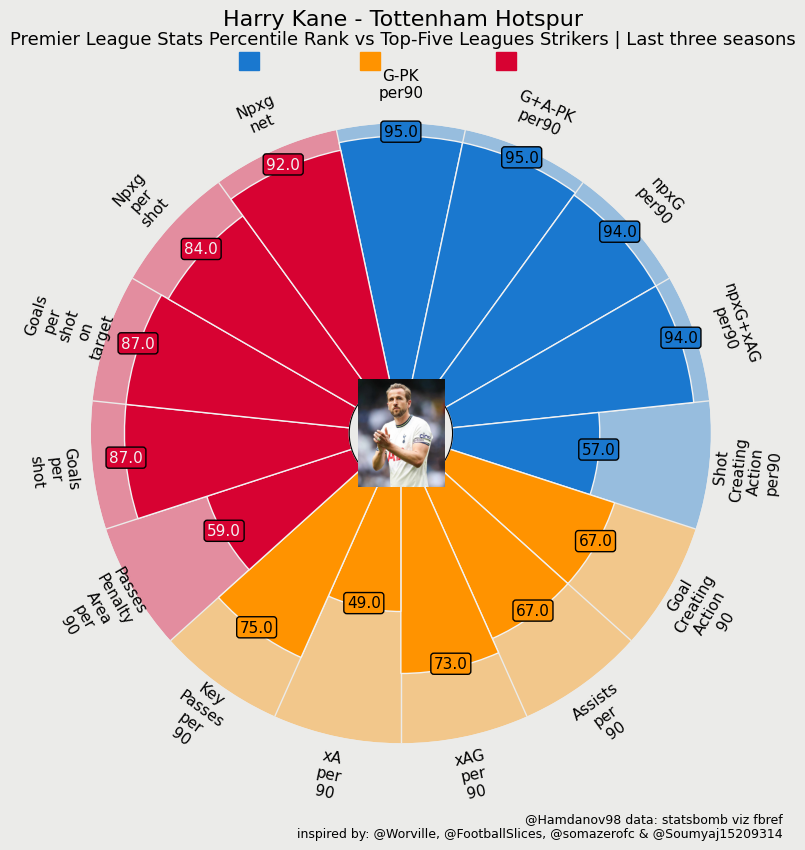

In [24]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


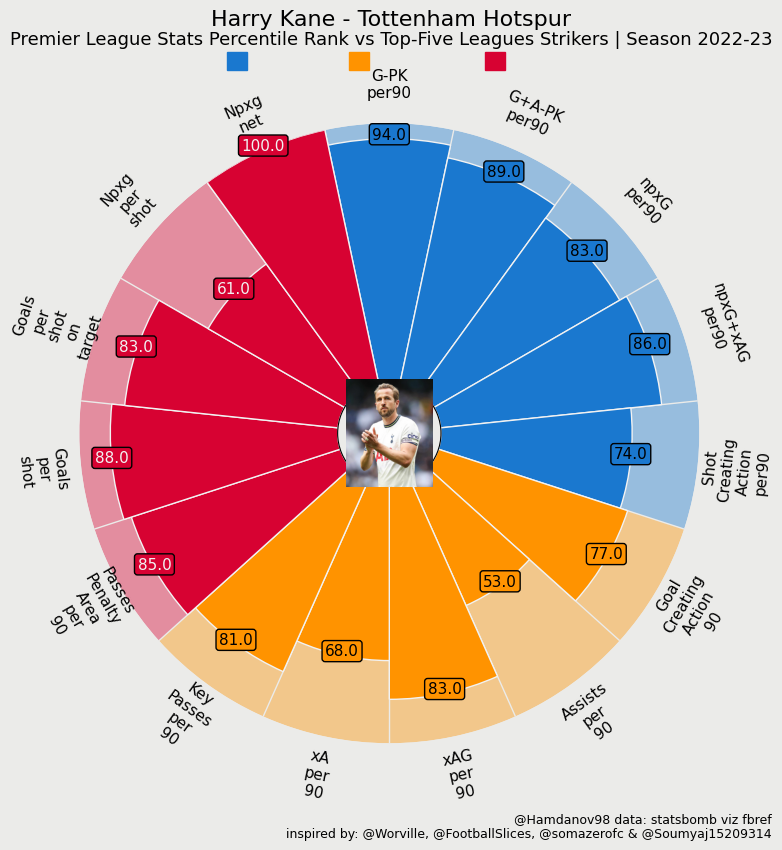

In [25]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_2023_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


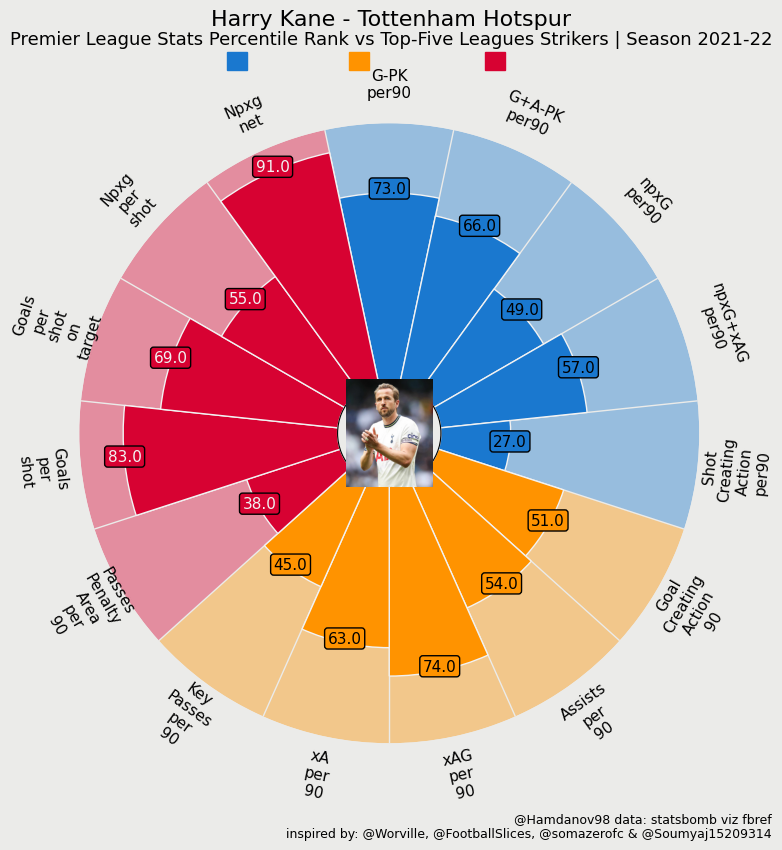

In [26]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2021-22",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


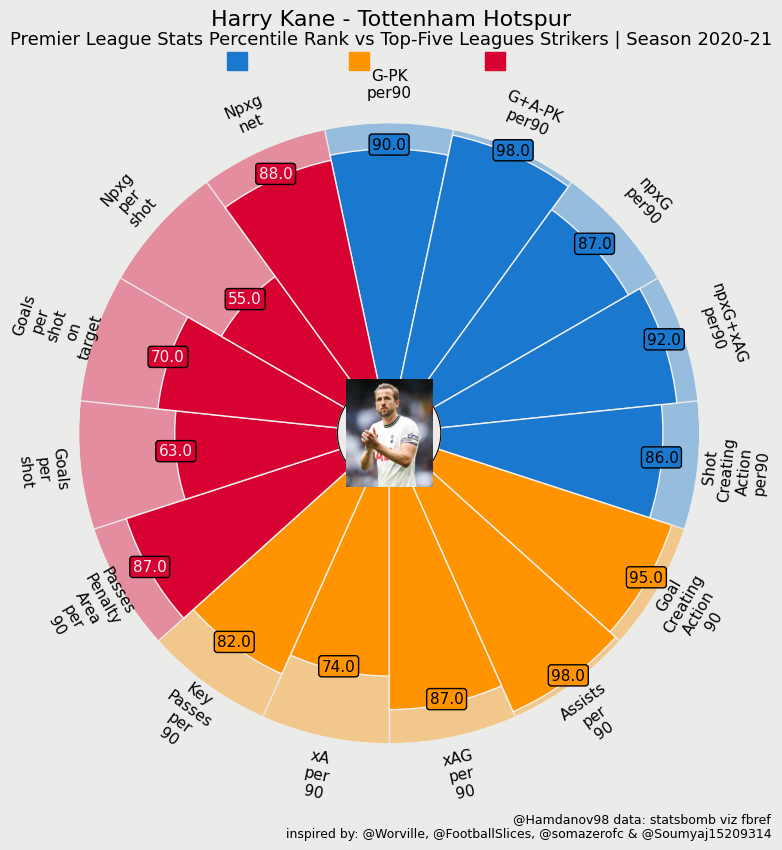

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_2021_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [28]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_forward_players = forward_players.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.3136109866032067,
 0.4212915311459491,
 0.48640753584460916,
 0.5448203471595674,
 0.5891832365558696,
 0.623562542669535,
 0.6531861497905761,
 0.6781990760322656,
 0.700598254456176,
 0.7208360789518385,
 0.7385713187395152,
 0.7548739102461085,
 0.769791271611858,
 0.7836666442131016,
 0.7961689730417268]

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [30]:
transformed_df

0          1         2          3         4         5         6   \
0    16.456126   2.041599 -6.702318   7.155173  2.064497 -0.819611 -0.598475   
1    13.933243   4.357185  1.239400   6.027209 -2.179059  0.438829  1.159047   
2     7.411427  -2.465330  0.257081  -2.694761  0.634056 -2.394155  1.342310   
3     5.190138 -11.065784 -3.258667   3.368535 -0.584671  1.072748 -0.634611   
4     0.563257  -5.075628  2.790512  -1.164021  1.051249 -3.062002  0.425965   
5    -0.810344  -4.852370  1.423403   1.452296  5.067428  2.337329  3.773321   
6    -1.172045  -3.950527  0.937331   0.068148  4.416755  0.920248  2.954260   
7     0.781693 -10.879373 -4.186992   4.814975 -0.184716 -0.217883 -1.129570   
8     2.581335   2.443559  3.030788   0.309349 -0.022726 -0.686574 -2.187704   
9     0.988983  -0.472145  2.017353  -2.892615  1.046033 -3.114085  0.910233   
10    2.187627  -6.454914 -0.626084   0.635875 -0.097920  0.592040 -1.729419   
11    3.130357  -5.511201  0.214718   0.245886 -1.860295  0.281140 -0.863711   
12    2.344705  -4.261606  0.880162   0.026526 -1.912233  0.330713 -1.646684   
13   -2.241548  -1.543424  1.573418   0.333446  1.315287  0.192310 -0.646649   
14   -1.696240  -1.685692  0.734455  -1.955331 -0.798165 -1.016195 -0.692413   
15   -0.471366  -0.973991  2.338322  -3.529320  1.937825 -1.586750 -1.904264   
16    7.094466   0.597762  1.617679   1.437804 -3.197502  0.803690  3.402926   
17    4.307785  -2.960728 -2.720348  -0.906378 -0.738551  0.115311  0.124351   
18    9.713578  -1.332574 -1.159597  -4.284262  0.820605 -0.934263 -1.434872   
19   -3.597359   1.036996  2.486046  -3.271589  1.453182 -0.765770 -3.592017   
20   -2.672528  -2.876664  3.880636   1.472069  7.391617  5.462770  5.537346   
21   10.113845   2.067935 -2.412151  -4.130884 -0.069903  0.745256 -0.893569   
22   -0.704055  -0.565961  2.097889  -0.474901  0.940128  0.783460 -0.520158   
23   -3.724501  -5.036823  0.615763   0.908186  1.360956 -3.337147  0.289036   
24   -1.390021  -2.176369  0.764983   0.147048  1.731421  5.671228 -1.009222   
25   -3.912593  -2.329387  2.402089  -0.947001 -0.092155 -0.603156 -1.504074   
26   -5.505653  -4.651605  0.906675   1.689247  1.620558 -2.876889  0.420922   
27   15.661041  -0.431041 -2.633074  -7.358776  2.156460 -2.165423 -1.602870   
28   11.411968  -2.278402  4.863736   1.679238 -3.473859  0.183046 -0.103318   
29   11.664850  -6.366726 -0.839446   1.835562 -4.447704  3.194906  1.221601   
30    9.440796  -1.590984 -0.987568  -1.886079  1.398828 -1.509046 -0.268255   
31   -2.992173  -0.314494  1.360803  -1.460657  1.193918 -2.434655  2.866631   
32   -2.209110  -2.680924  0.511858   1.173404 -1.018411 -1.050885  2.775929   
33   -0.538610  -1.151882  1.294957  -1.019966  5.941107  3.659486  3.809709   
34    7.242369  -0.484769  2.057593  -5.189534  1.461290 -2.048814 -3.152422   
35   -1.429420  -2.837293  2.656518  -0.137320 -1.168048 -1.411677  2.960837   
36    9.417680   0.755127  8.030118  -0.419954 -5.083242  3.405578  0.505307   
37   -2.667121  -1.657303  4.662423  -0.082795 -1.849631  0.831247 -0.641853   
38    6.347719   0.933928 -0.159686  -2.486269  0.549422 -0.893353  1.568372   
39    2.640751   4.367661  3.279583  -4.435543  0.202385 -1.200430  0.446295   
40    7.627920   3.110845  4.484830  -2.428942 -3.107881  1.743055  0.415951   
41    1.686279  -0.003634  7.292556  -3.010236 -1.107847 -2.425299  0.956187   
42    6.207242   3.110789  3.998470  -4.103928 -0.631510 -1.390922 -0.451374   
43   -1.124469  -1.949913  3.537057  -0.929861 -0.820683 -0.469793 -1.170279   
44    2.568311  -2.458593  1.611892   0.250023 -1.876779  2.098823 -0.463228   
45    8.374433  -2.374822 -0.860858   0.848444 -3.393632  1.397155  2.259841   
46    4.402316   0.263475 -1.445045  -1.678481 -0.599415  0.410157  0.982393   
47   -2.716405  -5.016283 -0.724245   1.735496  0.238303  0.674292 -1.157201   
48   18.822808   7.157744 -3.061569   0.100956  0.770232  0.233876 -0.513060   
49    5.0308

In [31]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[58].copy()
transformed_df = transformed_df.drop(transformed_df.index[58])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane', ascending=False).head(10)
top_similar_players

0          1         2         3         4         5         6  \
28  11.411968  -2.278402  4.863736  1.679238 -3.473859  0.183046 -0.103318   
93   4.465743  -6.705798 -0.510940  1.330901 -0.802614 -0.152244 -1.257372   
70  12.488697  -6.172974 -0.972199 -1.717647 -0.700941 -0.331353  0.338651   
29  11.664850  -6.366726 -0.839446  1.835562 -4.447704  3.194906  1.221601   
45   8.374433  -2.374822 -0.860858  0.848444 -3.393632  1.397155  2.259841   
76  18.187466  -6.843861 -4.859621 -1.245401  2.137329  0.235843 -1.745406   
11   3.130357  -5.511201  0.214718  0.245886 -1.860295  0.281140 -0.863711   
89   1.763066  -3.602503  0.277236  0.204245 -1.085781 -0.411540  0.538070   
3    5.190138 -11.065784 -3.258667  3.368535 -0.584671  1.072748 -0.634611   
12   2.344705  -4.261606  0.880162  0.026526 -1.912233  0.330713 -1.646684   

           7         8         9        10        11        12        13  \
28  0.246813  0.991489 -1.615884 -0.113479  1.341770 -0.727748 -1.498427   
93 -1.070441 -0.458700 -0.717185  0.890378  2.341950  0.137433  0.398048   
70  1.169014 -1.882421  0.586777 -1.181984  0.017457 -1.236911  2.241635   
29 -0.676636  1.197823 -1.395483 -1.800187  0.736529 -1.727325 -1.861440   
45  3.519101  0.786772 -1.124044  0.647562  0.144694  2.211369 -3.200043   
76  2.168286 -0.656520 -3.554669  0.268591  2.265238 -1.008373  0.564867   
11 -1.547999 -1.255317 -0.514335  1.524776  0.135150 -0.666679  1.064638   
89  0.356754 -0.080886  0.618990  1.494026 -0.422733 -0.533188 -0.340741   
3   0.602458  0.639303 -0.328754 -0.592831  0.221334  1.826355 -1.456413   
12 -0.575206 -0.088023  1.817079  1.197776  0.802231 -0.766262 -1.486699   

          14  similarity_to_kane  
28  0.009021            0.852612  
93  0.521638            0.840238  
70  2.411454            0.784916  
29 -0.395614            0.778989  
45  0.128667            0.757343  
76 -1.529750            0.740589  
11 -1.045690            0.739073  
89 -1.546942            0.724040  
3   0.030180            0.718893  
12  2.142728            0.705618

In [32]:
# Get the top 10 players most similar to Kane
top_similar_players_indices = transformed_df.sort_values('similarity_to_kane', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = forward_players.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0                    Player   Nation Pos  \
28          191                Iago Aspas   es ESP  FW   
93          736         Wissam Ben Yedder   fr FRA  FW   
70          507             Mohamed Salah   eg EGY  FW   
29          198             Karim Benzema   fr FRA  FW   
45          323             Gerard Moreno   es ESP  FW   
76          569             Kylian Mbappé   fr FRA  FW   
11           58             Ciro Immobile   it ITA  FW   
89          701             Álvaro Morata   es ESP  FW   
3            10        Robert Lewandowski   pl POL  FW   
12           71       Alexandre Lacazette   fr FRA  FW   
92          720             Son Heung-min   kr KOR  FW   
94          740          Domenico Berardi   it ITA  FW   
2             8           Marcus Rashford  eng ENG  FW   
81          637            Jonathan David   ca CAN  FW   
87          684                Sadio Mané   sn SEN  FW   
30          201               Rafael Leão   pt POR  FW   
16           89             Alassane Pléa   fr FRA  FW   
10           50          Lautaro Martínez   ar ARG  FW   
17          113                Diogo Jota   pt POR  FW   
71          508                    Joselu   es ESP  FW   
59          399             Romelu Lukaku   be BEL  FW   
36          259            Florian Sotoca   fr FRA  FW   
100         767           Felipe Anderson   br BRA  FW   
1             1              Paulo Dybala   ar ARG  FW   
73          510              Riyad Mahrez   dz ALG  FW   
66          480           Roberto Firmino   br BRA  FW   
95          742             Gabriel Jesus   br BRA  FW   
0             0               Luis Muriel   co COL  FW   
86          663          Karl Toko Ekambi   cm CMR  FW   
34          230             Wilfried Zaha   ci CIV  FW   
27          185           Vinicius Júnior   br BRA  FW   
7            34            Erling Haaland   no NOR  FW   
80          625         Randal Kolo Muani   fr FRA  FW   
18          121           Raheem Sterling  eng ENG  FW   
122         938                Martinelli   br BRA  FW   
84          658               André Silva   pt POR  FW   
38          273            Hirving Lozano   mx MEX  FW   
40          292          Nicolás González   ar ARG  FW   
91          707           Ludovic Ajorque   fr FRA  FW   
4            15             Ollie Watkins  eng ENG  FW   
44          309                Edin Džeko   ba BIH  FW   
48          333           Ousmane Dembélé   fr FRA  FW   
75          568         Kelechi Iheanacho   ng NGA  FW   
49          337              Duván Zapata   co COL  FW   
110         840                Ivan Toney  eng ENG  FW   
78          611             Kévin Gameiro   fr FRA  FW   
46          330            Joaquín Correa   ar ARG  FW   
21          139                   Rodrygo   br BRA  FW   
128         977           Gerard Deulofeu   es ESP  FW   
104         789          Marko Arnautović   at AUT  FW   
62          436            Iñaki Williams   gh GHA  FW   
8            35              Wahbi Khazri   tn TUN  FW   
69          506       Alexis Saelemaekers   be BEL  FW   
68          500             Daniele Verde   it ITA  FW   
42          303             Lucas Ocampos   ar ARG  FW   
57          396                 Enes Ünal   tr TUR  FW   
116         900             Donyell Malen   nl NED  FW   
55          390               Andy Delort   dz ALG  FW   
5            27            Dušan Vlahović   rs SRB  FW   
101         777              Bryan Mbeumo   cm CMR  FW   
52          370           Michail Antonio   jm JAM  FW   
9            43               Richarlison   br BRA  FW   
50          355                Lucas Boyé   ar ARG  FW   
167        1214     Khvicha Kvaratskhelia   ge GEO  FW   
131        1018                   Willian   br BRA  FW   
41          302            Emmanuel Gyasi   gh GHA  FW   
60          417            Victor Osimhen   ng NGA  FW   
43          304                 Che Adams  sct SCO  FW   
126

In [33]:
forward_players['similarity_to_kane']=transformed_df['similarity_to_kane']
forward_players[['Player', 'similarity_to_kane']]


Player  similarity_to_kane
0                 Luis Muriel            0.531156
1                Paulo Dybala            0.561565
2             Marcus Rashford            0.673731
3          Robert Lewandowski            0.718893
4               Ollie Watkins            0.430139
5              Dušan Vlahović            0.235891
6                 Terem Moffi            0.112138
7              Erling Haaland            0.500166
8                Wahbi Khazri            0.295856
9                 Richarlison            0.211811
10           Lautaro Martínez            0.653153
11              Ciro Immobile            0.739073
12        Alexandre Lacazette            0.705618
13                 Danny Ings           -0.116429
14               M'Bala Nzola           -0.124256
15           Mama Samba Baldé           -0.011924
16              Alassane Pléa            0.654138
17                 Diogo Jota            0.623571
18            Raheem Sterling            0.493879
19             Anthony Lozano           -0.423195
20           Francesco Caputo           -0.090485
21                    Rodrygo            0.353140
22              Borja Mayoral           -0.032124
23                Jamie Vardy           -0.000101
24            Sehrou Guirassy           -0.066877
25      Dominic Calvert-Lewin           -0.247187
26          Youssef En-Nesyri           -0.141561
27            Vinicius Júnior            0.504999
28                 Iago Aspas            0.852612
29              Karim Benzema            0.778989
30                Rafael Leão            0.659054
31              Kevin Lasagna           -0.395009
32          Gianluca Scamacca            0.066281
33          Alexander Sørloth           -0.106770
34              Wilfried Zaha            0.511848
35           Antonio Sanabria            0.132083
36             Florian Sotoca            0.575818
37               Steve Mounié            0.022002
38             Hirving Lozano            0.438472
39              Kevin Agudelo           -0.021262
40           Nicolás González            0.437707
41             Emmanuel Gyasi            0.183832
42              Lucas Ocampos            0.267390
43                  Che Adams            0.148593
44                 Edin Džeko            0.418905
45              Gerard Moreno            0.757343
46             Joaquín Correa            0.356682
47              Patrik Schick            0.095513
48            Ousmane Dembélé            0.407870
49               Duván Zapata            0.380777
50                 Lucas Boyé            0.211451
51            Sergi Guardiola           -0.410015
52            Michail Antonio            0.219652
53             Andrea Belotti            0.080089
54             El Bilal Touré           -0.459161
55                Andy Delort            0.254814
56                 Moise Kean           -0.405173
57                  Enes Ünal            0.267237
58                 Harry Kane                 NaN
59              Romelu Lukaku            0.590104
60             Victor Osimhen            0.160956
61              Callum Wilson           -0.010825
62             Iñaki Williams            0.298236
63           Krzysztof Piątek           -0.456443
64              Tammy Abraham            0.133134
65      Florian Niederlechner           -0.443252
66            Roberto Firmino            0.559367
67                       Kike            0.006333
68              Daniele Verde            0.292748
69        Alexis Saelemaekers            0.295713
70              Mohamed Salah            0.784916
71                     Joselu            0.618709
72            Ignatius Ganago           -0.349063
73               Riyad Mahrez            0.561367
74                   Rafa Mir           -0.164200
75          Kelechi Iheanacho            0.407019
76              Kylian Mbappé            0.740589
77               Ante Budimir           -0.205116
78              Kévin Gameiro            0.357228
79             Borja Ig

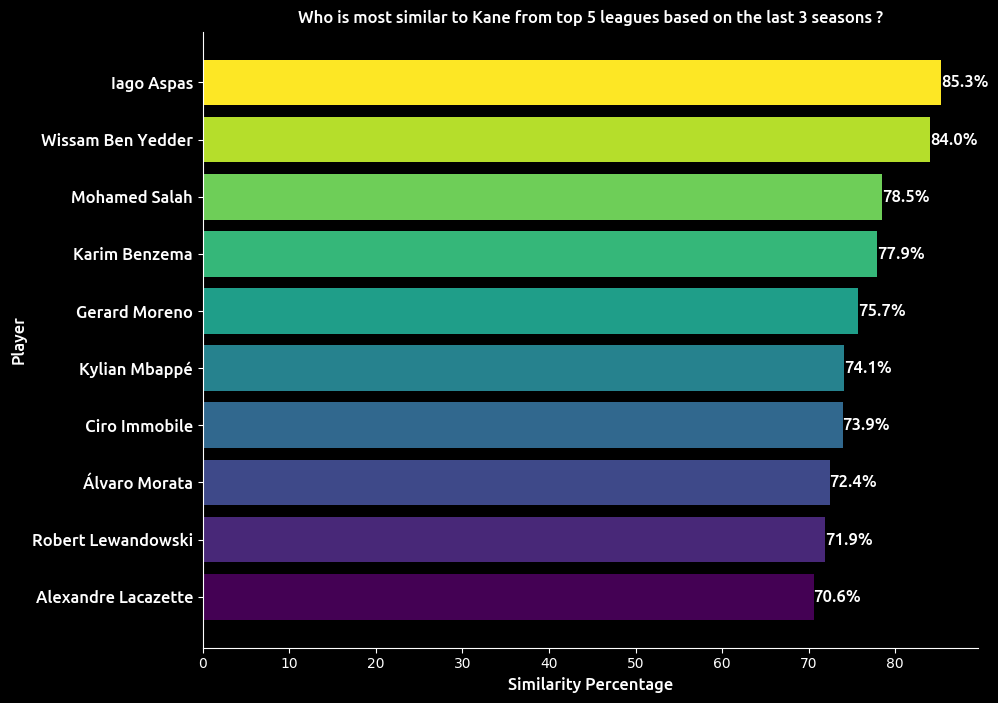

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_kane in descending order
forward_players_sorted = forward_players.sort_values(by='similarity_to_kane', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(10)[::-1], (forward_players_sorted['similarity_to_kane'].head(10)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Kane from top 5 leagues based on the last 3 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(10)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [35]:
forward_players_sorted

Unnamed: 0                    Player   Nation Pos  \
28          191                Iago Aspas   es ESP  FW   
93          736         Wissam Ben Yedder   fr FRA  FW   
70          507             Mohamed Salah   eg EGY  FW   
29          198             Karim Benzema   fr FRA  FW   
45          323             Gerard Moreno   es ESP  FW   
76          569             Kylian Mbappé   fr FRA  FW   
11           58             Ciro Immobile   it ITA  FW   
89          701             Álvaro Morata   es ESP  FW   
3            10        Robert Lewandowski   pl POL  FW   
12           71       Alexandre Lacazette   fr FRA  FW   
92          720             Son Heung-min   kr KOR  FW   
94          740          Domenico Berardi   it ITA  FW   
2             8           Marcus Rashford  eng ENG  FW   
81          637            Jonathan David   ca CAN  FW   
87          684                Sadio Mané   sn SEN  FW   
30          201               Rafael Leão   pt POR  FW   
16           89             Alassane Pléa   fr FRA  FW   
10           50          Lautaro Martínez   ar ARG  FW   
17          113                Diogo Jota   pt POR  FW   
71          508                    Joselu   es ESP  FW   
59          399             Romelu Lukaku   be BEL  FW   
36          259            Florian Sotoca   fr FRA  FW   
100         767           Felipe Anderson   br BRA  FW   
1             1              Paulo Dybala   ar ARG  FW   
73          510              Riyad Mahrez   dz ALG  FW   
66          480           Roberto Firmino   br BRA  FW   
95          742             Gabriel Jesus   br BRA  FW   
0             0               Luis Muriel   co COL  FW   
86          663          Karl Toko Ekambi   cm CMR  FW   
34          230             Wilfried Zaha   ci CIV  FW   
27          185           Vinicius Júnior   br BRA  FW   
7            34            Erling Haaland   no NOR  FW   
80          625         Randal Kolo Muani   fr FRA  FW   
18          121           Raheem Sterling  eng ENG  FW   
122         938                Martinelli   br BRA  FW   
84          658               André Silva   pt POR  FW   
38          273            Hirving Lozano   mx MEX  FW   
40          292          Nicolás González   ar ARG  FW   
91          707           Ludovic Ajorque   fr FRA  FW   
4            15             Ollie Watkins  eng ENG  FW   
44          309                Edin Džeko   ba BIH  FW   
48          333           Ousmane Dembélé   fr FRA  FW   
75          568         Kelechi Iheanacho   ng NGA  FW   
49          337              Duván Zapata   co COL  FW   
110         840                Ivan Toney  eng ENG  FW   
78          611             Kévin Gameiro   fr FRA  FW   
46          330            Joaquín Correa   ar ARG  FW   
21          139                   Rodrygo   br BRA  FW   
128         977           Gerard Deulofeu   es ESP  FW   
104         789          Marko Arnautović   at AUT  FW   
62          436            Iñaki Williams   gh GHA  FW   
8            35              Wahbi Khazri   tn TUN  FW   
69          506       Alexis Saelemaekers   be BEL  FW   
68          500             Daniele Verde   it ITA  FW   
42          303             Lucas Ocampos   ar ARG  FW   
57          396                 Enes Ünal   tr TUR  FW   
116         900             Donyell Malen   nl NED  FW   
55          390               Andy Delort   dz ALG  FW   
5            27            Dušan Vlahović   rs SRB  FW   
101         777              Bryan Mbeumo   cm CMR  FW   
52          370           Michail Antonio   jm JAM  FW   
9            43               Richarlison   br BRA  FW   
50          355                Lucas Boyé   ar ARG  FW   
167        1214     Khvicha Kvaratskhelia   ge GEO  FW   
131        1018                   Willian   br BRA  FW   
41          302            Emmanuel Gyasi   gh GHA  FW   
60          417            Victor Osimhen   ng NGA  FW   
43          304                 Che Adams  sct SCO  FW   
126

In [36]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
aspas_percentile_ranks = round(players_percentile_ranks.iloc[[28]],0)

# Print the percentile ranks for Harry aspas
print(aspas_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
28        54.0          67.0        37.0            57.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
28                        74.0                     67.0            79.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
28        86.0       91.0               96.0                        87.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
28            97.0                      98.0           92.0      94.0  


In [37]:
aspas_percentile_ranks_list = aspas_percentile_ranks.values.flatten().tolist()

aspas_percentile_ranks_list

[54.0,
 67.0,
 37.0,
 57.0,
 74.0,
 67.0,
 79.0,
 86.0,
 91.0,
 96.0,
 87.0,
 97.0,
 98.0,
 92.0,
 94.0]

In [38]:
image_path = "Aspas.jpg"
fdj_cropped = Image.open(image_path)


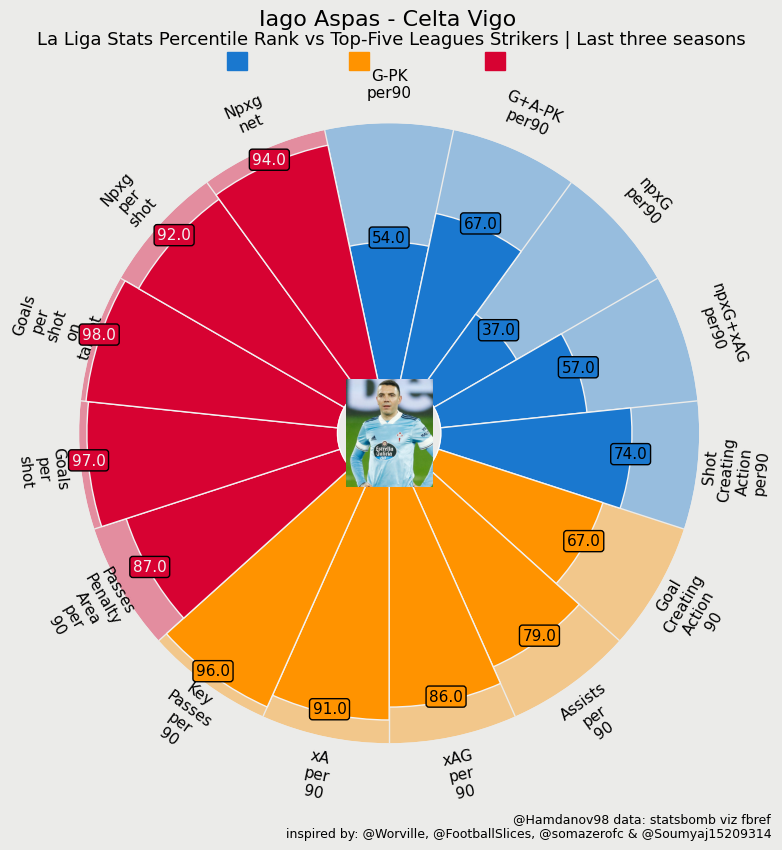

In [39]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    aspas_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Iago Aspas - Celta Vigo ", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Aspas_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [40]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
wissam_percentile_ranks = round(players_percentile_ranks.iloc[[93]],0)

# Print the percentile ranks for Harry wissam
print(wissam_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
93        89.0          91.0        77.0            84.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
93                        48.0                     72.0            82.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
93        82.0       86.0               65.0                        85.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
93           100.0                      99.0           95.0      93.0  


In [41]:
wissam_percentile_ranks_list = wissam_percentile_ranks.values.flatten().tolist()

wissam_percentile_ranks_list

[89.0,
 91.0,
 77.0,
 84.0,
 48.0,
 72.0,
 82.0,
 82.0,
 86.0,
 65.0,
 85.0,
 100.0,
 99.0,
 95.0,
 93.0]

In [42]:
image_path = "BenYedder.jpg"
fdj_cropped = Image.open(image_path)


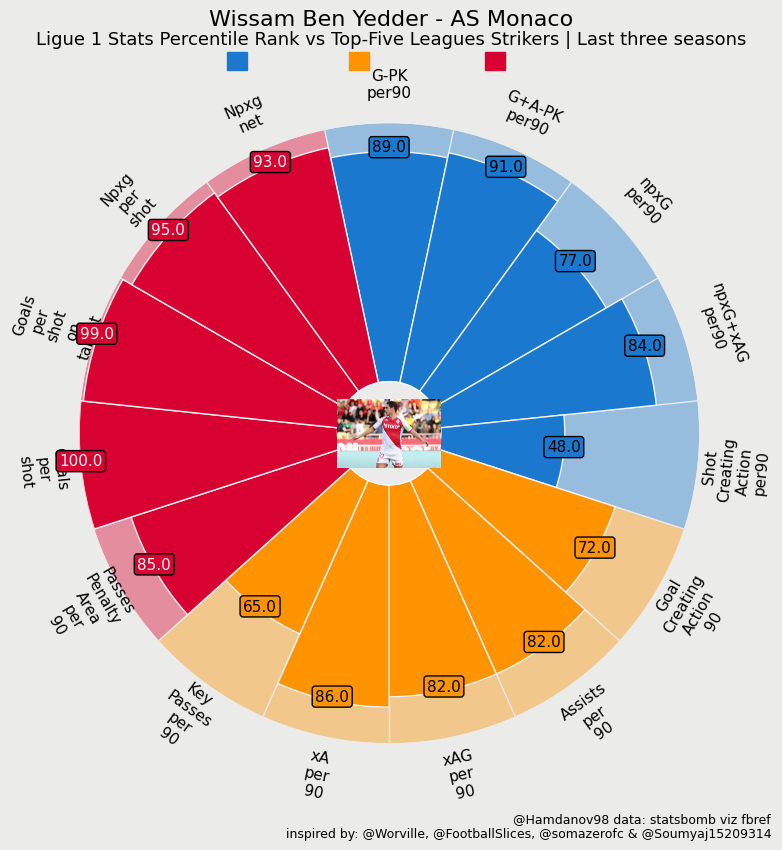

In [43]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    wissam_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Wissam Ben Yedder - AS Monaco", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('BenYedder_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [44]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_forward_players = player_2023.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.20378916647837358,
 0.31233187858128486,
 0.3798026800676825,
 0.424983066352862,
 0.46305391820754305,
 0.4976583687047872,
 0.5314443775653039,
 0.5615336418499919,
 0.5874720973077716,
 0.6111727553421792,
 0.6324434763206856,
 0.6517400178468621,
 0.6699203088445487,
 0.6860075926221503,
 0.7017903508094693]

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [46]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[139].copy()
transformed_df = transformed_df.drop(transformed_df.index[139])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_2023'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_2023', ascending=False).head(10)


In [47]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_2023 = transformed_df.sort_values('similarity_to_kane_2023', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_2023 = player_2023.loc[top_similar_players_indices_2023]
top_similar_players_2023

Unnamed: 0.1  Unnamed: 0                     Player   Nation Pos  \
153          1220        1455        Alexandre Lacazette   fr FRA  FW   
172          1403        1684           Lautaro Martínez   ar ARG  FW   
91            801         961            Niclas Füllkrug   de GER  FW   
6              70          80             Miguel Almirón   py PAR  FW   
245          1826        2201            Marcus Rashford  eng ENG  FW   
171          1400        1680                 Martinelli   br BRA  FW   
8              93         105            Felipe Anderson   br BRA  FW   
178          1432        1717              Borja Mayoral   es ESP  FW   
312          2325        2837            Mattia Zaccagni   it ITA  FW   
24            222         254            Sheraldo Becker   sr SUR  FW   
254          1941        2351           Antonio Sanabria   py PAR  FW   
93            814         975              Kévin Gameiro   fr FRA  FW   
17            137         152                 Iago Aspas   es ESP  FW   
289          2158        2634                 Ivan Toney  eng ENG  FW   
209          1611        1932              Arnaud Nordin   fr FRA  FW   
212          1620        1947               M'Bala Nzola   ao ANG  FW   
65            611         720               Habib Diallo   sn SEN  FW   
59            559         654             Jonathan David   ca CAN  FW   
179          1439        1724              Kylian Mbappé   fr FRA  FW   
27            242         279          Wissam Ben Yedder   fr FRA  FW   
251          1922        2329                Bukayo Saka  eng ENG  FW   
253          1937        2344           Mama Samba Baldé   gw GNB  FW   
252          1927        2334              Mohamed Salah   eg EGY  FW   
151          1214        1445      Khvicha Kvaratskhelia   ge GEO  FW   
158          1276        1526         Robert Lewandowski   pl POL  FW   
86            771         925                 Phil Foden  eng ENG  FW   
123          1049        1258                  Junya Ito   jp JPN  FW   
303          2291        2799             Iñaki Williams   gh GHA  FW   
292          2196        2681                  Enes Ünal   tr TUR  FW   
80            713         846               Breel Embolo   ch SUI  FW   
199          1561        1873               Vedat Muriqi   xk KVX  FW   
133          1090        1308                     Joselu   es ESP  FW   
146          1176        1404          Randal Kolo Muani   fr FRA  FW   
121          1037        1238             Jonathan Ikone   fr FRA  FW   
305          2294        2802                    Willian   br BRA  FW   
20            181         208             Jonathan Bamba   ci CIV  FW   
34            317         367                 Lucas Boyé   ar ARG  FW   
304          2293        2801              Nico Williams   es ESP  FW   
14            122         135           Marko Arnautović   at AUT  FW   
299          2263        2768                  Elye Wahi   fr FRA  FW   
100           894        1074              Jack Grealish  eng ENG  FW   
222          1712        2060                      Pedro   es ESP  FW   
180          1442        1727               Bryan Mbeumo   cm CMR  FW   
29            250         290           Domenico Berardi   it ITA  FW   
218          1661        1995             Victor Osimhen   ng NGA  FW   
215          1652        1985                Loïs Openda   be BEL  FW   
105           937        1129             Erling Haaland   no NOR  FW   
73            675         800             Marvin Ducksch   de GER  FW   
136          1102        1322            Vinicius Júnior   br BRA  FW   
152          1215        1446               Grejohn Kyei   fr FRA  FW   
167          1357        1625              Donyell Malen   nl NED  FW   
217          1658        1991          Riccardo Orsolini   it ITA  FW   
185          1506        1806        Aleksandar Mitrović   rs SRB  FW   
58            544         635             Thijs Dallinga   nl N

In [48]:
player_2023['similarity_to_kane_2023']=transformed_df['similarity_to_kane_2023']
player_2023[['Player', 'similarity_to_kane_2023']]


Player  similarity_to_kane_2023
0                Tammy Abraham                 0.400393
1                 Mohamed Achi                -0.393000
2                    Che Adams                 0.346941
3                   Amar Ahmed                -0.312533
4           Babatunde Akinsola                -0.278678
5                Ángel Alarcón                -0.398008
6               Miguel Almirón                 0.892571
7               Carlos Álvarez                -0.356086
8              Felipe Anderson                 0.856145
9                Komnen Andrić                 0.123863
10               Janis Antiste                 0.008440
11             Michail Antonio                 0.119105
12                      Antony                 0.438779
13              Taïryk Arconte                -0.751550
14            Marko Arnautović                 0.654270
15                      Arthur                -0.096750
16              Fisnik Asllani                -0.701323
17                  Iago Aspas                 0.822036
18               Taiwo Awoniyi                 0.147550
19             Folarin Balogun                 0.335891
20              Jonathan Bamba                 0.680116
21             Patrick Bamford                -0.386335
22            Gil Bastião Dias                -0.309103
23                        Bebé                -0.101284
24             Sheraldo Becker                 0.842531
25               Kevin Behrens                 0.523064
26              Andrea Belotti                -0.649731
27           Wissam Ben Yedder                 0.781784
28               Karim Benzema                 0.567934
29            Domenico Berardi                 0.638397
30              Álex Berenguer                 0.509086
31              Mergim Berisha                 0.280247
32                        Beto                 0.131070
33                 Myron Boadu                -0.128636
34                  Lucas Boyé                 0.656873
35               Armando Broja                -0.458735
36          Jacob Bruun Larsen                -0.669002
37                Ante Budimir                 0.024853
38       Dominic Calvert-Lewin                -0.537662
39              Sergio Camello                 0.441843
40          Matteo Cancellieri                -0.585815
41               Thomas Cannon                -0.335842
42        Valentín Castellanos                 0.425912
43              Edinson Cavani                 0.002849
44                Assan Ceesay                 0.245012
45                  Emil Ceide                -0.353830
46             Darko Churlinov                -0.438104
47              Daniel Ciofani                -0.064970
48               Diego Collado                -0.288125
49             Lorenzo Colombo                -0.161410
50               Maxwel Cornet                -0.674152
51                Jesús Corona                 0.087774
52              Joaquín Correa                -0.017667
53                 Diego Costa                -0.518590
54                   Juan Cruz                -0.513959
55               Luca D'Andrea                -0.669524
56               Moanes Dabbur                 0.315709
57                 Patson Daka                -0.125924
58              Thijs Dallinga                 0.593143
59              Jonathan David                 0.806555
60             Grégoire Defrel                -0.421387
61             Ousmane Dembélé                 0.455422
62              Cyriel Dessers                -0.074593
63             Gerard Deulofeu                 0.207502
64             Mamadou Diakhon                -0.554105
65                Habib Diallo                 0.806941
66                   Luis Díaz                 0.390498
67               Florian Dietz                -0.678442
68                  Lois Diony                -0.755650
69               Moussa Djitte                -0.758578
70           Alan Do Marcolino                -0

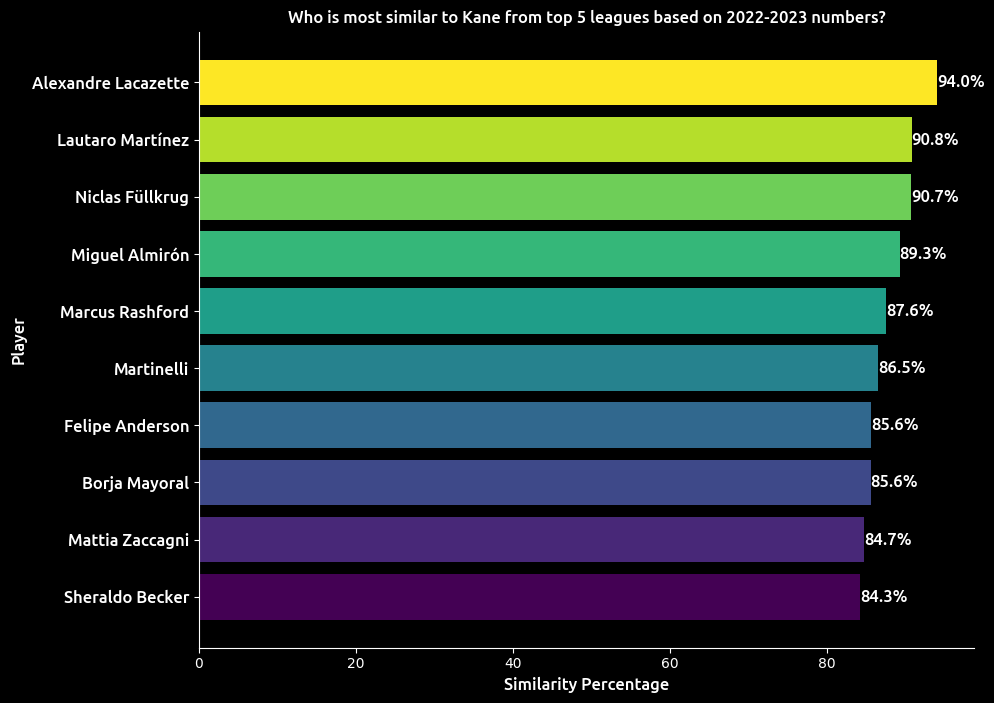

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_kane in descending order
forward_players_sorted = player_2023.sort_values(by='similarity_to_kane_2023', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(10)[::-1], (forward_players_sorted['similarity_to_kane_2023'].head(10)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Kane from top 5 leagues based on 2022-2023 numbers?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(10)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)
# Save the figure
plt.savefig('Similar_2023.png', transparent=False,dpi=500,bbox_inches = 'tight')

plt.show()


In [50]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
fullkrug_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[91]],0)

# Print the percentile ranks for Harry fullkrug
print(fullkrug_2023_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
91        77.0          80.0        61.0            60.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
91                        58.0                     62.0            77.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
91        66.0       73.0               71.0                        79.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
91            72.0                      64.0           52.0      91.0  


In [51]:
fullkrug_2023_percentile_ranks_list = fullkrug_2023_percentile_ranks.values.flatten().tolist()

fullkrug_2023_percentile_ranks_list

[77.0,
 80.0,
 61.0,
 60.0,
 58.0,
 62.0,
 77.0,
 66.0,
 73.0,
 71.0,
 79.0,
 72.0,
 64.0,
 52.0,
 91.0]

In [52]:
image_path = "Fullkrug.jpg"
fdj_cropped = Image.open(image_path)


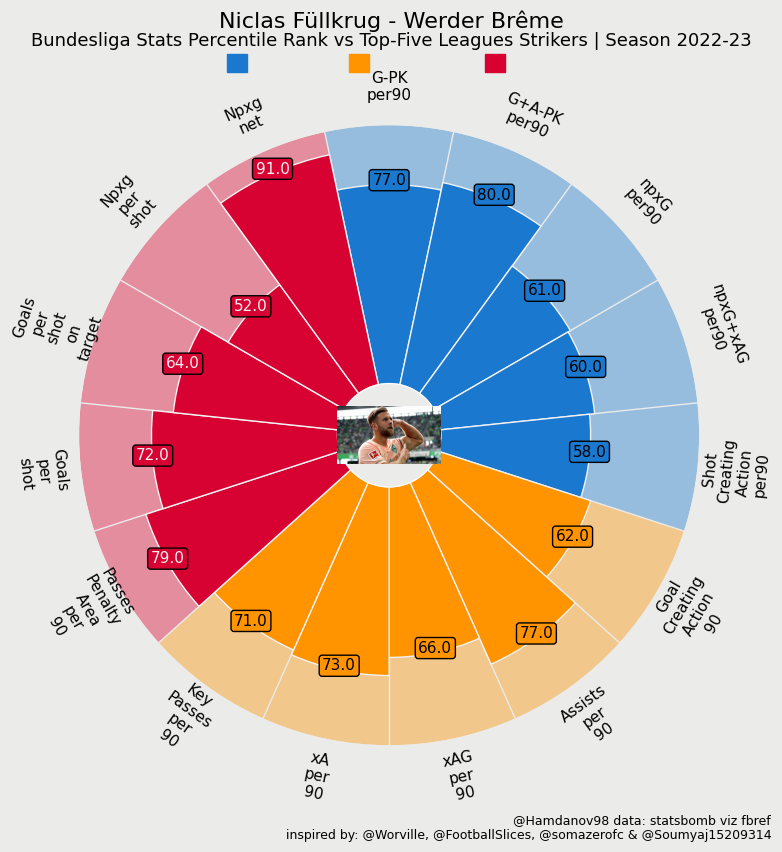

In [53]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    fullkrug_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Niclas Füllkrug - Werder Brême", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Fullkrug_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [54]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
lacazette_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[153]],0)

# Print the percentile ranks for Harry lacazette
print(lacazette_2023_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
153        94.0          91.0        91.0            91.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
153                        74.0                     60.0            69.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
153        78.0       87.0               79.0                        89.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
153            88.0                      81.0           84.0      96.0  


In [55]:
lacazette_2023_percentile_ranks_list = lacazette_2023_percentile_ranks.values.flatten().tolist()

lacazette_2023_percentile_ranks_list

[94.0,
 91.0,
 91.0,
 91.0,
 74.0,
 60.0,
 69.0,
 78.0,
 87.0,
 79.0,
 89.0,
 88.0,
 81.0,
 84.0,
 96.0]

In [56]:
image_path = "Lacazette.jpg"
fdj_cropped = Image.open(image_path)


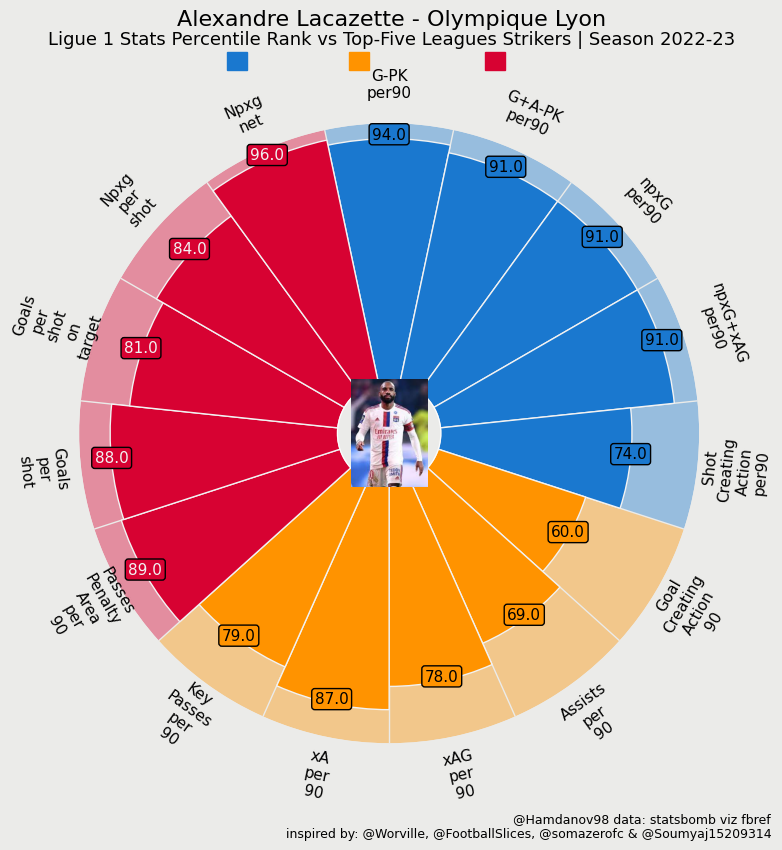

In [57]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lacazette_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Alexandre Lacazette - Olympique Lyon", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Lacazette_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [58]:


# Concatenate newbie and kane_data vertically
newbie = pd.concat([newbie, Kane], ignore_index=True)

# Now the data for "Kane_2023" is added as the final row in the "newbie" DataFrame
newbie

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
0           95.0         107             Komnen Andrić   rs SRB  FW   
1          106.0         118                    Antony   br BRA  FW   
2          129.0         143                    Arthur   br BRA  FW   
3          179.0         206           Folarin Balogun   us USA  FW   
4          225.0         260             Kevin Behrens   de GER  FW   
5          255.0         297            Mergim Berisha   de GER  FW   
6          387.0         446            Sergio Camello   es ESP  FW   
7          416.0         491      Valentín Castellanos   ar ARG  FW   
8          429.0         504              Assan Ceesay   gm GAM  FW   
9          467.0         546            Daniel Ciofani   it ITA  FW   
10         487.0         568           Lorenzo Colombo   it ITA  FW   
11         510.0         593               Diego Costa   es ESP  FW   
12         544.0         635            Thijs Dallinga   nl NED  FW   
13         594.0         702            Cyriel Dessers   ng NGA  FW   
14         672.0         796          Dion Drena Beljo   hr CRO  FW   
15         675.0         800            Marvin Ducksch   de GER  FW   
16         741.0         884                 Ansu Fati   es ESP  FW   
17         751.0         898             Evan Ferguson   ie IRL  FW   
18         801.0         961           Niclas Füllkrug   de GER  FW   
19         928.0        1120            Gorka Guruzeta   es ESP  FW   
20         977.0        1174             Luiz Henrique   br BRA  FW   
21        1003.0        1201           Philipp Hofmann   de GER  FW   
22        1025.0        1226            Rasmus Højlund   dk DEN  FW   
23        1031.0        1232        Mounaim El Idrissy   fr FRA  FW   
24        1049.0        1258                 Junya Ito   jp JPN  FW   
25        1055.0        1265           Nicolas Jackson   sn SEN  FW   
26        1127.0        1351            Wilfried Kanga   ci CIV  FW   
27        1130.0        1354             Kenan Karaman   tr TUR  FW   
28        1181.0        1409             Ibrahima Koné   ml MLI  FW   
29        1214.0        1445     Khvicha Kvaratskhelia   ge GEO  FW   
30        1215.0        1446              Grejohn Kyei   fr FRA  FW   
31        1235.0        1473                Cyle Larin   ca CAN  FW   
32        1270.0        1518               Sergio León   es ESP  FW   
33        1429.0        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
34        1512.0        1814           Mostafa Mohamed   eg EGY  FW   
35        1523.0        1830             Kieffer Moore  wls WAL  FW   
36        1538.0        1849         Youssoufa Moukoko   de GER  FW   
37        1597.0        1916              M'Baye Niang   sn SEN  FW   
38        1606.0        1927             Eddie Nketiah  eng ENG  FW   
39        1616.0        1940              Darwin Núñez   uy URU  FW   
40        1645.0        1977                Ado Onaiwu   jp JPN  FW   
41        1652.0        1985               Loïs Openda   be BEL  FW   
42        1655.0        1988              Divock Origi   be BEL  FW   
43        1714.0        2062              Jordan Pefok   us USA  FW   
44        1766.0        2131             Gonzalo Plata   ec ECU  FW   
45        2015.0        2448             Abdallah Sima   sn SEN  FW   
46        2033.0        2472             Islam Slimani   dz ALG  FW   
47        2084.0        2539      Jørgen Strand Larsen   no NOR  FW   
48        2089.0        2544          Cristhian Stuani   uy URU  FW   
49        2097.0        2554     Crysencio Summerville   nl NED  FW   
50        2127.0        2592             Simon Terodde   de GER  FW   
51        2144.0        2618            Steffen Tigges   de GER  FW   
52        2184.0        2666            Frank Tsadjout   it ITA  FW   
53        2249.0        2750           Carlos Vinícius   br BRA  FW   
54        2297.0        2805              Harry Wilson  wls WAL  FW   
55        2355.0        2876

In [59]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Removing non-numerical columns
numerical_forward_players = newbie.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]
# Handling missing values by imputation
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well
numerical_forward_players_imputed = imputer.fit_transform(numerical_forward_players)

# Normalizing the data
normalized_forward_players = (numerical_forward_players_imputed - numerical_forward_players_imputed.mean()) / numerical_forward_players_imputed.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.9877889682558245,
 0.9955611186035568,
 0.9995868754076558,
 0.9998084671430698,
 0.9999046332710646,
 0.9999373662739262,
 0.9999576579807417,
 0.9999699676794817,
 0.9999791163258684,
 0.9999839874128932,
 0.9999873067768963,
 0.9999899539975817,
 0.9999920146897031,
 0.99999347465893,
 0.9999945799946104]

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=2)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [61]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_newbie'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_newbie', ascending=False).head(10)
top_similar_players

0         1  similarity_to_kane_newbie
6    1.756850 -0.050408                   0.999999
30   1.414838 -0.017522                   0.999884
24  11.087526  0.216079                   0.998890
15   8.638662  0.338660                   0.997768
44   4.368681  0.437026                   0.991903
18   6.943663  0.837806                   0.989110
29  12.264863  2.279495                   0.977739
21   2.312690 -0.586017                   0.975781
1    5.859100  1.525298                   0.960414
20   1.648926  0.538176                   0.941711

In [62]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_newbie = transformed_df.sort_values('similarity_to_kane_newbie', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_newbie = newbie.loc[top_similar_players_indices_newbie]
top_similar_players_newbie

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
6          387.0         446            Sergio Camello   es ESP  FW   
30        1215.0        1446              Grejohn Kyei   fr FRA  FW   
24        1049.0        1258                 Junya Ito   jp JPN  FW   
15         675.0         800            Marvin Ducksch   de GER  FW   
44        1766.0        2131             Gonzalo Plata   ec ECU  FW   
18         801.0         961           Niclas Füllkrug   de GER  FW   
29        1214.0        1445     Khvicha Kvaratskhelia   ge GEO  FW   
21        1003.0        1201           Philipp Hofmann   de GER  FW   
1          106.0         118                    Antony   br BRA  FW   
20         977.0        1174             Luiz Henrique   br BRA  FW   
23        1031.0        1232        Mounaim El Idrissy   fr FRA  FW   
3          179.0         206           Folarin Balogun   us USA  FW   
16         741.0         884                 Ansu Fati   es ESP  FW   
54        2297.0        2805              Harry Wilson  wls WAL  FW   
0           95.0         107             Komnen Andrić   rs SRB  FW   
41        1652.0        1985               Loïs Openda   be BEL  FW   
12         544.0         635            Thijs Dallinga   nl NED  FW   
19         928.0        1120            Gorka Guruzeta   es ESP  FW   
7          416.0         491      Valentín Castellanos   ar ARG  FW   
56        2437.0          74               Sam Lammers   nl NED  FW   
46        2033.0        2472             Islam Slimani   dz ALG  FW   
34        1512.0        1814           Mostafa Mohamed   eg EGY  FW   
40        1645.0        1977                Ado Onaiwu   jp JPN  FW   
5          255.0         297            Mergim Berisha   de GER  FW   
50        2127.0        2592             Simon Terodde   de GER  FW   
45        2015.0        2448             Abdallah Sima   sn SEN  FW   
8          429.0         504              Assan Ceesay   gm GAM  FW   
28        1181.0        1409             Ibrahima Koné   ml MLI  FW   
51        2144.0        2618            Steffen Tigges   de GER  FW   
49        2097.0        2554     Crysencio Summerville   nl NED  FW   
38        1606.0        1927             Eddie Nketiah  eng ENG  FW   
13         594.0         702            Cyriel Dessers   ng NGA  FW   
47        2084.0        2539      Jørgen Strand Larsen   no NOR  FW   
43        1714.0        2062              Jordan Pefok   us USA  FW   
10         487.0         568           Lorenzo Colombo   it ITA  FW   
26        1127.0        1351            Wilfried Kanga   ci CIV  FW   
31        1235.0        1473                Cyle Larin   ca CAN  FW   
4          225.0         260             Kevin Behrens   de GER  FW   
37        1597.0        1916              M'Baye Niang   sn SEN  FW   
2          129.0         143                    Arthur   br BRA  FW   
17         751.0         898             Evan Ferguson   ie IRL  FW   
32        1270.0        1518               Sergio León   es ESP  FW   
33        1429.0        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
53        2249.0        2750           Carlos Vinícius   br BRA  FW   
39        1616.0        1940              Darwin Núñez   uy URU  FW   
25        1055.0        1265           Nicolas Jackson   sn SEN  FW   
11         510.0         593               Diego Costa   es ESP  FW   
35        1523.0        1830             Kieffer Moore  wls WAL  FW   
52        2184.0        2666            Frank Tsadjout   it ITA  FW   
22        1025.0        1226            Rasmus Højlund   dk DEN  FW   
36        1538.0        1849         Youssoufa Moukoko   de GER  FW   
48        2089.0        2544          Cristhian Stuani   uy URU  FW   
9          467.0         546            Daniel Ciofani   it ITA  FW   
55        2355.0        2876              Simon Zoller   de GER  FW   
14         672.0         796          Dion Drena Beljo   hr CRO  FW   
42        1655.0        1988

In [63]:


# Concatenate newbie and kane_data vertically
newbie = pd.concat([newbie, Kane_2023], ignore_index=True)

# Now the data for "Kane_2023" is added as the final row in the "newbie" DataFrame


In [64]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Removing non-numerical columns
numerical_forward_players = newbie.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.iloc[:, 3:]
# Handling missing values by imputation
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well
numerical_forward_players_imputed = imputer.fit_transform(numerical_forward_players)

# Normalizing the data
normalized_forward_players = (numerical_forward_players_imputed - numerical_forward_players_imputed.mean()) / numerical_forward_players_imputed.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.9879535322236079,
 0.9953586929899513,
 0.9995792491209274,
 0.9998141372009558,
 0.9999080448964258,
 0.9999394318950613,
 0.9999588735831076,
 0.999970605252878,
 0.9999794205281184,
 0.9999840622397546,
 0.9999872613489272,
 0.999989977656622,
 0.9999919429570251,
 0.9999934585943339,
 0.9999946763113347]

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=2)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [66]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_newbie_2023'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_newbie_2023', ascending=False).head(10)
top_similar_players

0         1  similarity_to_kane_newbie_2023
30   1.173333 -0.018261                        0.999864
24  10.663558  0.212934                        0.999819
57  47.035522 -1.307797                        0.999587
6    1.506941 -0.050933                        0.999397
15   8.257278  0.331528                        0.999233
44   4.069739  0.427509                        0.994626
18   6.592913  0.820018                        0.992470
29  11.806540  2.232325                        0.982766
1    5.531716  1.494353                        0.965641
21   2.054052 -0.575228                        0.962697

In [67]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_newbie = transformed_df.sort_values('similarity_to_kane_newbie_2023', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_newbie = newbie.loc[top_similar_players_indices_newbie]
top_similar_players_newbie

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
30        1215.0        1446              Grejohn Kyei   fr FRA  FW   
24        1049.0        1258                 Junya Ito   jp JPN  FW   
57           NaN         397                Harry Kane  eng ENG  FW   
6          387.0         446            Sergio Camello   es ESP  FW   
15         675.0         800            Marvin Ducksch   de GER  FW   
44        1766.0        2131             Gonzalo Plata   ec ECU  FW   
18         801.0         961           Niclas Füllkrug   de GER  FW   
29        1214.0        1445     Khvicha Kvaratskhelia   ge GEO  FW   
1          106.0         118                    Antony   br BRA  FW   
21        1003.0        1201           Philipp Hofmann   de GER  FW   
20         977.0        1174             Luiz Henrique   br BRA  FW   
23        1031.0        1232        Mounaim El Idrissy   fr FRA  FW   
3          179.0         206           Folarin Balogun   us USA  FW   
16         741.0         884                 Ansu Fati   es ESP  FW   
54        2297.0        2805              Harry Wilson  wls WAL  FW   
0           95.0         107             Komnen Andrić   rs SRB  FW   
41        1652.0        1985               Loïs Openda   be BEL  FW   
12         544.0         635            Thijs Dallinga   nl NED  FW   
7          416.0         491      Valentín Castellanos   ar ARG  FW   
19         928.0        1120            Gorka Guruzeta   es ESP  FW   
46        2033.0        2472             Islam Slimani   dz ALG  FW   
56        2437.0          74               Sam Lammers   nl NED  FW   
40        1645.0        1977                Ado Onaiwu   jp JPN  FW   
34        1512.0        1814           Mostafa Mohamed   eg EGY  FW   
5          255.0         297            Mergim Berisha   de GER  FW   
50        2127.0        2592             Simon Terodde   de GER  FW   
45        2015.0        2448             Abdallah Sima   sn SEN  FW   
38        1606.0        1927             Eddie Nketiah  eng ENG  FW   
8          429.0         504              Assan Ceesay   gm GAM  FW   
49        2097.0        2554     Crysencio Summerville   nl NED  FW   
28        1181.0        1409             Ibrahima Koné   ml MLI  FW   
51        2144.0        2618            Steffen Tigges   de GER  FW   
13         594.0         702            Cyriel Dessers   ng NGA  FW   
17         751.0         898             Evan Ferguson   ie IRL  FW   
47        2084.0        2539      Jørgen Strand Larsen   no NOR  FW   
4          225.0         260             Kevin Behrens   de GER  FW   
33        1429.0        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
43        1714.0        2062              Jordan Pefok   us USA  FW   
10         487.0         568           Lorenzo Colombo   it ITA  FW   
26        1127.0        1351            Wilfried Kanga   ci CIV  FW   
31        1235.0        1473                Cyle Larin   ca CAN  FW   
35        1523.0        1830             Kieffer Moore  wls WAL  FW   
52        2184.0        2666            Frank Tsadjout   it ITA  FW   
37        1597.0        1916              M'Baye Niang   sn SEN  FW   
2          129.0         143                    Arthur   br BRA  FW   
32        1270.0        1518               Sergio León   es ESP  FW   
53        2249.0        2750           Carlos Vinícius   br BRA  FW   
11         510.0         593               Diego Costa   es ESP  FW   
25        1055.0        1265           Nicolas Jackson   sn SEN  FW   
39        1616.0        1940              Darwin Núñez   uy URU  FW   
36        1538.0        1849         Youssoufa Moukoko   de GER  FW   
48        2089.0        2544          Cristhian Stuani   uy URU  FW   
22        1025.0        1226            Rasmus Højlund   dk DEN  FW   
9          467.0         546            Daniel Ciofani   it ITA  FW   
27        1130.0        1354             Kenan Karaman   tr TUR  FW   
55        2355.0        2876

In [68]:


# Concatenate newbie and kane_data vertically
newbie = pd.concat([newbie, Kane_2021], ignore_index=True)



In [69]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_newbie_2021'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_newbie_2021', ascending=False).head(10)
top_similar_players

0         1  similarity_to_kane_newbie_2023  \
24  10.663558  0.212934                        0.999819   
15   8.257278  0.331528                        0.999233   
18   6.592913  0.820018                        0.992470   
29  11.806540  2.232325                        0.982766   
44   4.069739  0.427509                        0.994626   
1    5.531716  1.494353                        0.965641   
21   2.054052 -0.575228                        0.962697   
6    1.506941 -0.050933                        0.999397   
3    1.874305 -1.030051                        0.875921   
20   1.404797  0.526912                        0.936637   

    similarity_to_kane_newbie_2021  
24                        0.996257  
15                        0.992806  
18                        0.980608  
29                        0.975307  
44                        0.967996  
1                         0.947772  
21                        0.892734  
6                         0.845059  
3                         0.830933  
20                        0.796727

In [70]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_newbie_2021 = transformed_df.sort_values('similarity_to_kane_newbie_2021', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_newbie_2021 = newbie.loc[top_similar_players_indices_newbie_2021]
top_similar_players_newbie_2021

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
24        1049.0      1258.0                 Junya Ito   jp JPN  FW   
15         675.0       800.0            Marvin Ducksch   de GER  FW   
18         801.0       961.0           Niclas Füllkrug   de GER  FW   
29        1214.0      1445.0     Khvicha Kvaratskhelia   ge GEO  FW   
44        1766.0      2131.0             Gonzalo Plata   ec ECU  FW   
1          106.0       118.0                    Antony   br BRA  FW   
21        1003.0      1201.0           Philipp Hofmann   de GER  FW   
6          387.0       446.0            Sergio Camello   es ESP  FW   
3          179.0       206.0           Folarin Balogun   us USA  FW   
20         977.0      1174.0             Luiz Henrique   br BRA  FW   
16         741.0       884.0                 Ansu Fati   es ESP  FW   
30        1215.0      1446.0              Grejohn Kyei   fr FRA  FW   
23        1031.0      1232.0        Mounaim El Idrissy   fr FRA  FW   
54        2297.0      2805.0              Harry Wilson  wls WAL  FW   
0           95.0       107.0             Komnen Andrić   rs SRB  FW   
41        1652.0      1985.0               Loïs Openda   be BEL  FW   
12         544.0       635.0            Thijs Dallinga   nl NED  FW   
19         928.0      1120.0            Gorka Guruzeta   es ESP  FW   
56        2437.0        74.0               Sam Lammers   nl NED  FW   
4          225.0       260.0             Kevin Behrens   de GER  FW   
7          416.0       491.0      Valentín Castellanos   ar ARG  FW   
22        1025.0      1226.0            Rasmus Højlund   dk DEN  FW   
39        1616.0      1940.0              Darwin Núñez   uy URU  FW   
49        2097.0      2554.0     Crysencio Summerville   nl NED  FW   
46        2033.0      2472.0             Islam Slimani   dz ALG  FW   
45        2015.0      2448.0             Abdallah Sima   sn SEN  FW   
40        1645.0      1977.0                Ado Onaiwu   jp JPN  FW   
25        1055.0      1265.0           Nicolas Jackson   sn SEN  FW   
34        1512.0      1814.0           Mostafa Mohamed   eg EGY  FW   
5          255.0       297.0            Mergim Berisha   de GER  FW   
55        2355.0      2876.0              Simon Zoller   de GER  FW   
50        2127.0      2592.0             Simon Terodde   de GER  FW   
8          429.0       504.0              Assan Ceesay   gm GAM  FW   
51        2144.0      2618.0            Steffen Tigges   de GER  FW   
47        2084.0      2539.0      Jørgen Strand Larsen   no NOR  FW   
28        1181.0      1409.0             Ibrahima Koné   ml MLI  FW   
37        1597.0      1916.0              M'Baye Niang   sn SEN  FW   
33        1429.0      1713.0  Eric Maxim Choupo-Moting   cm CMR  FW   
35        1523.0      1830.0             Kieffer Moore  wls WAL  FW   
38        1606.0      1927.0             Eddie Nketiah  eng ENG  FW   
10         487.0       568.0           Lorenzo Colombo   it ITA  FW   
13         594.0       702.0            Cyriel Dessers   ng NGA  FW   
2          129.0       143.0                    Arthur   br BRA  FW   
31        1235.0      1473.0                Cyle Larin   ca CAN  FW   
43        1714.0      2062.0              Jordan Pefok   us USA  FW   
52        2184.0      2666.0            Frank Tsadjout   it ITA  FW   
17         751.0       898.0             Evan Ferguson   ie IRL  FW   
32        1270.0      1518.0               Sergio León   es ESP  FW   
26        1127.0      1351.0            Wilfried Kanga   ci CIV  FW   
14         672.0       796.0          Dion Drena Beljo   hr CRO  FW   
11         510.0       593.0               Diego Costa   es ESP  FW   
36        1538.0      1849.0         Youssoufa Moukoko   de GER  FW   
27        1130.0      1354.0             Kenan Karaman   tr TUR  FW   
9          467.0       546.0            Daniel Ciofani   it ITA  FW   
42        1655.0      1988.0              Divock Origi   be BEL  FW   
53        2249.0      2750.0